<a href="https://colab.research.google.com/github/PeterArbaugh/deep_learning_python/blob/main/ch4_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
len(train_labels)

8982

In [6]:
len(test_labels)

2246

In [7]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    reverse_word_index.get(i - 3, "?") for i in train_data[0]
)

550378/550378 [==============================] - 0s 0us/step


In [9]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
        results[i , j] = 1.
  return results
  
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [15]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"]
              )

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 91ms/step - loss: 2.6427 - accuracy: 0.5202 - val_loss: 1.7617 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 1s 51ms/step - loss: 1.4341 - accuracy: 0.7050 - val_loss: 1.3121 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 1s 55ms/step - loss: 1.0522 - accuracy: 0.7761 - val_loss: 1.1633 - val_accuracy: 0.7420
Epoch 4/20
16/16 [==============================] - 1s 53ms/step - loss: 0.8324 - accuracy: 0.8264 - val_loss: 1.0387 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 1s 54ms/step - loss: 0.6633 - accuracy: 0.8592 - val_loss: 0.9837 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 1s 53ms/step - loss: 0.5231 - accuracy: 0.8941 - val_loss: 0.9178 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 0.4231 - accuracy: 0.9118 - val_loss: 0.9134 - val_accuracy: 0.8100
Epoch 8/20
16

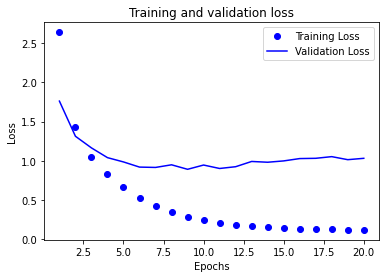

In [19]:
import matplotlib.pyplot as plt
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training Loss")
plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

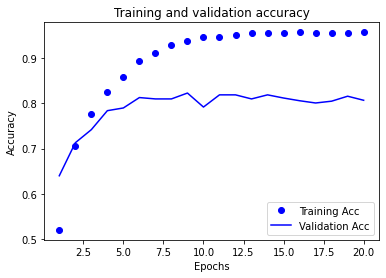

In [20]:
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training Acc")
plt.plot(epochs, val_acc, "b", label="Validation Acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retrain from scratch to avoid overfitting

In [31]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"]
              )

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

Epoch 1/9
16/16 [==============================] - 3s 121ms/step - loss: 2.5106 - accuracy: 0.5112 - val_loss: 1.6691 - val_accuracy: 0.6440
Epoch 2/9
16/16 [==============================] - 2s 100ms/step - loss: 1.3910 - accuracy: 0.7048 - val_loss: 1.2805 - val_accuracy: 0.7080
Epoch 3/9
16/16 [==============================] - 1s 94ms/step - loss: 1.0401 - accuracy: 0.7706 - val_loss: 1.1044 - val_accuracy: 0.7500
Epoch 4/9
16/16 [==============================] - 1s 55ms/step - loss: 0.8104 - accuracy: 0.8297 - val_loss: 1.0155 - val_accuracy: 0.7790
Epoch 5/9
16/16 [==============================] - 1s 55ms/step - loss: 0.6418 - accuracy: 0.8658 - val_loss: 0.9417 - val_accuracy: 0.8060
Epoch 6/9
16/16 [==============================] - 1s 55ms/step - loss: 0.5084 - accuracy: 0.8931 - val_loss: 0.9131 - val_accuracy: 0.8050
Epoch 7/9
16/16 [==============================] - 1s 58ms/step - loss: 0.4128 - accuracy: 0.9143 - val_loss: 0.8713 - val_accuracy: 0.8170
Epoch 8/9
16/16 [=

In [24]:
results

[0.9600745439529419, 0.7960819005966187]